In [1]:
import json
import pandas as pd
import numpy as np
from datetime import datetime
import prettytable as pt
from matplotlib import pyplot as plt
import os
import warnings
warnings.filterwarnings("ignore")



###################################################################################################
                                                                                                  #
from rhoova.Client import *                                                                       #   
#Register and get api key from https://app.rhoova.com/ for ClientConfig("api key", "api secret")  #
config = ClientConfig("", "")                                                                     #
api = Api(config)                                                                                 # 
                                                                                                  #
###################################################################################################


directory = os.path.normpath(os.getcwd() + os.sep + os.pardir)
yielddatadirectory=directory+"/data/yielddata/yielddata.csv"
inflationdatadirectory=directory+"/data/inflationdata/inflationdata.csv"



yielddata= pd.read_csv(yielddatadirectory)
inflationdata = pd.read_csv(inflationdatadirectory)
yielddata = yielddata.replace(np.nan, '', regex=True) 


In [2]:
data = {
  "valuationDate": "2021-06-08",
  "inflationCurve": {
    "settlementDays": 2,
    "intpMethod": "Linear",
    "currency": "USD",
    "calendar": "UnitedStates",
    "dayCounter": "Thirty360",
    "period": "",
    "instruments": {
      "YoYSwap": {
        "businessDayConvention": "ModifiedFollowing",
        "dayCounter": "Actual365Fixed",
        "observationLag": "3M"
      }
    },
    "inflationIndex": {
      "indexName": "CPURNSA",
      "index": "YoY",
      "interpolated": True
    }
  },
  "yieldCurve": {
    "settlementDays": 2,
    "intpMethod": "Linear",
    "currency": "USD",
    "calendar": "UnitedStates",
    "dayCounter": "Actual360",
    "period": "3M",
    "instruments": {
      "DEPO": {
        "businessDayConvention": "ModifiedFollowing",
        "dayCounter": "Actual360"
      },
      "FUTURES": {
        "businessDayConvention": "ModifiedFollowing",
        "dayCounter": "Actual360",
        "market": "IMM"
      },
      "IRS": {
        "businessDayConvention": "ModifiedFollowing",
        "dayCounter": "Thirty360",
        "frequency": "Semiannual"
      }
    }
  },
  "yieldData": yielddata.to_dict('r'),
  "inflationData": inflationdata.to_dict('r')

       }

try:
    result = api.createTask(CalculationType.INFLATION_CURVE, data,True)
    result=json.loads(result["result"])
except RhoovaError as e:
    e.printPretty()


In [3]:
inflationdatacurve=result.get("inflationNodeData"),
yoyrates=result.get("yoyRates")
dates=[]
inflationdates= {}
rhoovainflationdicts = {}
rhoovayoyrates = {}
for rhvzr in inflationdatacurve[0]:
    rhoovainflationdicts[datetime.strptime(rhvzr.get('date'),'%Y-%m-%d').date()] = rhvzr.get('rate')*100
    dates.append(rhvzr.get('date'))

for rhv in yoyrates:
    rhoovayoyrates[datetime.strptime(rhv.get('date'), '%Y-%m-%d').date()] = rhv.get('rate')*100

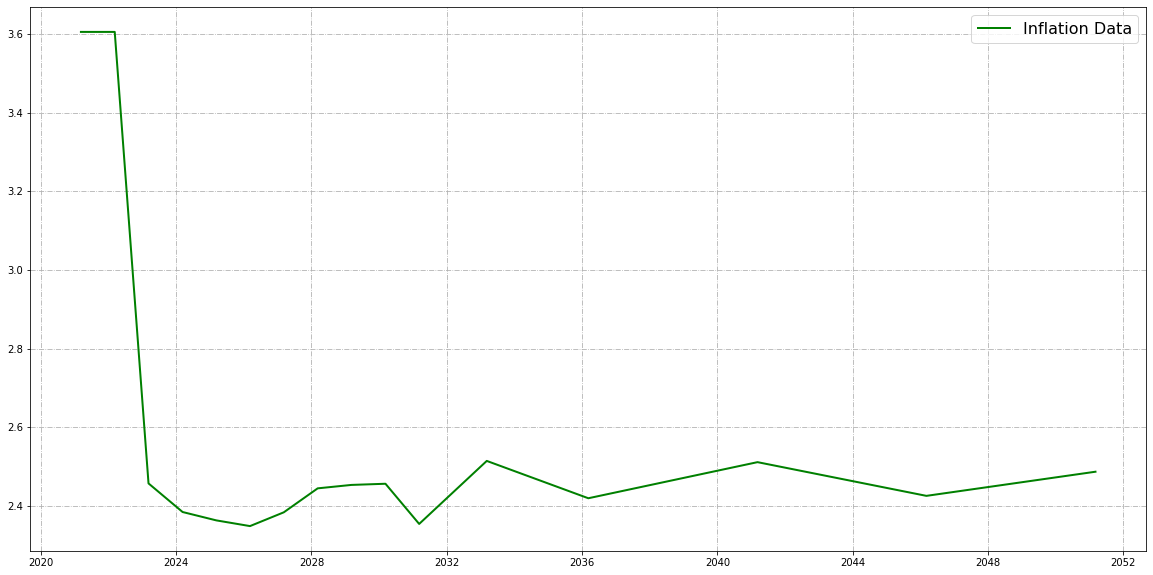

In [4]:
fig, ax = plt.subplots(figsize=(20, 10))

x=list(rhoovainflationdicts.keys())
y = list(rhoovainflationdicts.values())


ax.plot(x,y, 'g', label='Inflation Data', linewidth=2)
#
leg = ax.legend(prop={'size': 16});
plt.grid(linestyle='dashdot')
plt.show()

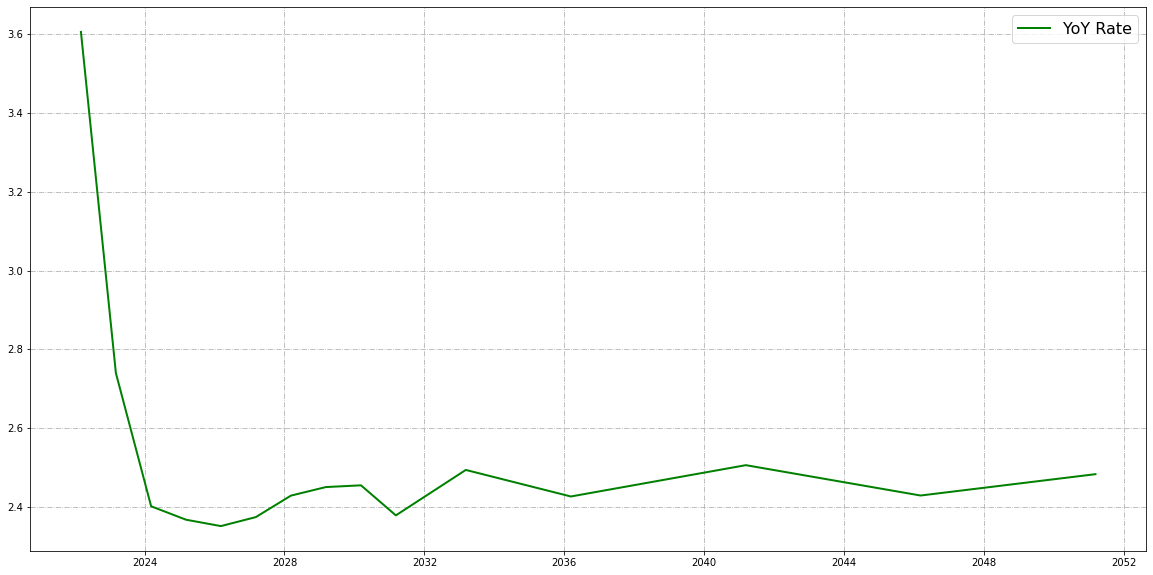

In [5]:
fig, ax = plt.subplots(figsize=(20, 10))

x=list(rhoovayoyrates.keys())
y = list(rhoovayoyrates.values())


ax.plot(x,y, 'g', label='YoY Rate', linewidth=2)
#
leg = ax.legend(prop={'size': 16});
plt.grid(linestyle='dashdot')
plt.show()

In [6]:
pTable = pt.PrettyTable(['Maturity','Inflation Rates'])
i=0
for key, val in rhoovainflationdicts.items():
    pTable.add_row([key,val])
    i=i+1
pTable.align = 'c'
pTable.float_format = '.6'
print(pTable)

+------------+-----------------+
|  Maturity  | Inflation Rates |
+------------+-----------------+
| 2021-03-08 |     3.606000    |
| 2022-03-08 |     3.606000    |
| 2023-03-08 |     2.456838    |
| 2024-03-10 |     2.384058    |
| 2025-03-09 |     2.362751    |
| 2026-03-08 |     2.348220    |
| 2027-03-08 |     2.383289    |
| 2028-03-08 |     2.444290    |
| 2029-03-08 |     2.453012    |
| 2030-03-10 |     2.455986    |
| 2031-03-09 |     2.353704    |
| 2033-03-08 |     2.514103    |
| 2036-03-09 |     2.419083    |
| 2041-03-10 |     2.510959    |
| 2046-03-08 |     2.425170    |
| 2051-03-08 |     2.486610    |
+------------+-----------------+


In [7]:

pTable = pt.PrettyTable(['Maturity','Zero Rates'])
i=0
for key, val in rhoovayoyrates.items():
    pTable.add_row([key,val])
    i=i+1
pTable.align = 'c'
pTable.float_format = '.6'
print(pTable)

+------------+------------+
|  Maturity  | Zero Rates |
+------------+------------+
| 2022-03-08 |  3.606000  |
| 2023-03-08 |  2.740193  |
| 2024-03-10 |  2.402055  |
| 2025-03-09 |  2.368019  |
| 2026-03-08 |  2.351813  |
| 2027-03-08 |  2.374642  |
| 2028-03-08 |  2.429123  |
| 2029-03-08 |  2.450861  |
| 2030-03-10 |  2.455257  |
| 2031-03-09 |  2.378994  |
| 2033-03-08 |  2.494328  |
| 2036-03-09 |  2.426965  |
| 2041-03-10 |  2.506433  |
| 2046-03-08 |  2.429403  |
| 2051-03-08 |  2.483582  |
+------------+------------+
